In [21]:
import pandas as pd
import os
from  typing import Union, Tuple
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle

import utils

# M2 T01: Graphic visualization of a dataset
Complementing the exploration techniques of the data by means of the graphic visualization, with the libraries Matplotlib and Searborn.


## Import data (again)

In [2]:
file_name = "input/DelayedFlights.csv"

# import df again, just some columns
root = os.getcwd()

# ?? inspect variables 
print(root)
new_wd = "kaggle-airline-df"
wd_dir = os.path.join(root,new_wd)
os.chdir(wd_dir)


col_names = pd.read_csv(file_name, nrows=1).columns.tolist()
print(col_names)
# /home/su/workspace/python/ciencia_dades_python/CDP_all_lessons_code/kaggle-airline-df/input/DelayedFlights.csv


/home/su/workspace/python/ciencia_dades_python/CDP_all_lessons_code
['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


In [3]:
# import selected columns
df = pd.read_csv(
    # os.path.realpath('..') + "/archive/DelayedFlights_simple.csv",
    # os.path.realpath('..') + "/archive/DelayedFlights.csv",
    file_name,
    usecols = ['UniqueCarrier', 'Year', 'Month', 'DayofMonth', 'Distance', 'AirTime', 'DepTime', 'CRSDepTime', 'ArrDelay', 'DepDelay'])
print(df)

         Year  Month  DayofMonth  DepTime  CRSDepTime UniqueCarrier  AirTime  \
0        2008      1           3   2003.0        1955            WN    116.0   
1        2008      1           3    754.0         735            WN    113.0   
2        2008      1           3    628.0         620            WN     76.0   
3        2008      1           3   1829.0        1755            WN     77.0   
4        2008      1           3   1940.0        1915            WN     87.0   
...       ...    ...         ...      ...         ...           ...      ...   
1936753  2008     12          13   1250.0        1220            DL    120.0   
1936754  2008     12          13    657.0         600            DL     78.0   
1936755  2008     12          13   1007.0         847            DL    122.0   
1936756  2008     12          13   1251.0        1240            DL     89.0   
1936757  2008     12          13   1110.0        1103            DL    104.0   

         ArrDelay  DepDelay  Distance  

## Plot data

The task is: 

- 1. Create a view for a categorical variable (UniqueCarrier)
- 2. Create a view for a numeric variable (ArrDelay)
- 3. Create a view for Variable numeric and category (ArrDelay and UniqueCarrier)
-   Create a view for Three variables (ArrDelay, DepDelay and UniqueCarrier)
-   Create a view for Two numeric variables (ArrDelay and DepDelay)
-   Create a view for Three variables (ArrDelay, DepDelay and UniqueCarrier)
-   Create a view for Three variables (ArrDelay, DepDelay and UniqueCarrier)
-   Create a view for More than three variables (ArrDelay, DepDelay, AirTime and UniqueCarrier




    1. Una variable categòrica (UniqueCarrier)
    2. Una variable numèrica (ArrDelay)
    3. Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
    4 Dues variables numèriques (ArrDelay i DepDelay)
    5 Tres variables (ArrDelay, DepDelay i UniqueCarrier)
    6 Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).


## 1 Categorical 

Check the most present airlines (carrier)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

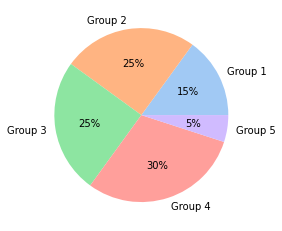

In [5]:
data = [15, 25, 25, 30, 5]
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

data = [15, 25, 25, 30, 5]
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [22]:
df_pie = df.groupby('UniqueCarrier')

print(df_pie.size())
# df_pie.mean().head()
df_pie.mean()['UniqueCarrier'].head()

UniqueCarrier
9E     51885
AA    191865
AQ       750
AS     39293
B6     55315
CO    100195
DL    114238
EV     81877
F9     28269
FL     71284
HA      7490
MQ    141920
NW     79108
OH     52657
OO    132433
UA    141426
US     98425
WN    377602
XE    103663
YV     67063
dtype: int64


KeyError: 'UniqueCarrier'

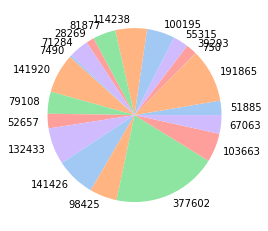

In [8]:

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(
    df.groupby('UniqueCarrier').size(),
    labels=    df.groupby('UniqueCarrier').size(),
    colors=colors)
plt.show()


In [15]:
pie_df = df.groupby('UniqueCarrier', as_index=False, sort=False)['ArrDelay'].size()
pie_df.head()

,UniqueCarrier,size
0,WN,377602
1,XE,103663
2,YV,67063
3,OH,52657
4,OO,132433


In [23]:
# add explicit Carrier name
pie_df['CarrierName'] = pie_df.apply(
    lambda row : utils.mapper.find_carrier_name(
        row['UniqueCarrier']))

pie_df

AttributeError: module 'utils' has no attribute 'mapper'

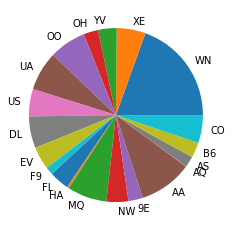

In [16]:
plt.pie(
    pie_df['size'],
    labels=pie_df['UniqueCarrier'],
    # colors=colors
    )
plt.show()

<AxesSubplot:xlabel='UniqueCarrier'>

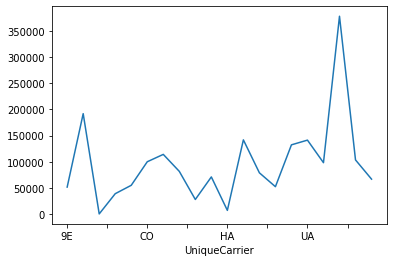

In [6]:
# 1. Create a view for a categorical variable (UniqueCarrier)
# count the flight total number for each carrier
df.groupby('UniqueCarrier').size().plot()
# df.groupby(
#     ['UniqueCarrier'])['UniqueCarrier'].transform('count').astype('int')


<AxesSubplot:>

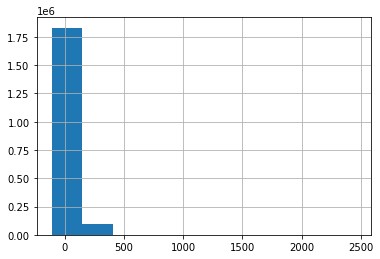

In [8]:
# 2. Create a view for a numeric variable (ArrDelay)
df['ArrDelay'].hist()

In [ ]:
# 3. Create a view for Variable numeric and category (ArrDelay and UniqueCarrier)
# ?? how mix them? 

In [ ]:
#    Create a view for Three variables (ArrDelay, DepDelay and UniqueCarrier)


In [ ]:
#    Create a view for Variable numeric and category (ArrDelay and UniqueCarrier)


In [ ]:
#    Create a view for Two numeric variables (ArrDelay and DepDelay)


In [ ]:
#    Create a view for Three variables (ArrDelay, DepDelay and UniqueCarrier)


In [ ]:
#    Create a view for Three variables (ArrDelay, DepDelay and UniqueCarrier)


array([[<AxesSubplot:title={'center':'9E'}>,
        <AxesSubplot:title={'center':'AA'}>,
        <AxesSubplot:title={'center':'AQ'}>,
        <AxesSubplot:title={'center':'AS'}>],
       [<AxesSubplot:title={'center':'B6'}>,
        <AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'DL'}>,
        <AxesSubplot:title={'center':'EV'}>],
       [<AxesSubplot:title={'center':'F9'}>,
        <AxesSubplot:title={'center':'FL'}>,
        <AxesSubplot:title={'center':'HA'}>,
        <AxesSubplot:title={'center':'MQ'}>],
       [<AxesSubplot:title={'center':'NW'}>,
        <AxesSubplot:title={'center':'OH'}>,
        <AxesSubplot:title={'center':'OO'}>,
        <AxesSubplot:title={'center':'UA'}>],
       [<AxesSubplot:title={'center':'US'}>,
        <AxesSubplot:title={'center':'WN'}>,
        <AxesSubplot:title={'center':'XE'}>,
        <AxesSubplot:title={'center':'YV'}>]], dtype=object)

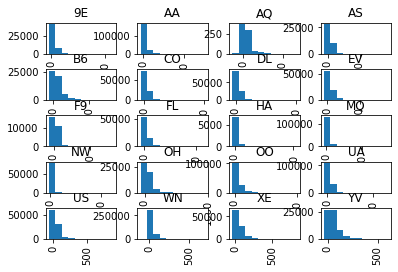

In [9]:
# get a serie of plot, each by a specific carrier
df['ArrDelay'].hist(by=df['UniqueCarrier'])

In [ ]:
#    Create a view for More than three variables (ArrDelay, DepDelay, AirTime and UniqueCarrier


##  Exercises 2

Export graphics as gold or html images.
def plot_categorical(): 
    pass



##  Exercises 3
It integrates the graphical visualizations, in pocket 2, of Module 1. 

Descripció

Complementing the exploration techniques of the dades mitjantçant la visualització gràfica, amb les llibreries Matplotlib i Searborn.
Nivell 1
- Exercici 1

Resumeix gràficament el data set DelayedFlights.csv

Create almenys a visualització for:

     A categorical variable (UniqueCarrier)
     A numeric variable (ArrDelay)
     A numeric variable i a category (ArrDelay i UniqueCarrier)
     Dues variables numèriques (ArrDelay i DepDelay)
     Tres variables (ArrDelay, DepDelay i UniqueCarrier)
     Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

- Exercici 2

Export els gràfics com imatges or com html.

- Exercici 3

It integrates the visualitzacions gràfiques, in pocket 2, of Mòdul 1.

M2 T01: Visualització gràfica d'un dataset
Descripció

Complementa les tècniques d'exploració de les dades mitjantçant la visualització gràfica, amb les llibreries Matplotlib i Searborn.
Nivell 1
- Exercici 1

Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

    Una variable categòrica (UniqueCarrier)
    Una variable numèrica (ArrDelay)
    Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
    Dues variables numèriques (ArrDelay i DepDelay)
    Tres variables (ArrDelay, DepDelay i UniqueCarrier)
    Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

- Exercici 2

Exporta els gràfics com imatges o com html.

- Exercici 3

Integra les visualitzacions gràfiques, en la tasca 2, del Mòdul 1.

# Exercises 1

Create a function that, given an array of one dimension, gives you a basic statistical summary of the data. If it detects that the array has more than one dimension, it should display an error message.

In [19]:
def array_stat(arr: np.array, precision=5) -> Union[dict, str]:
    if arr.size == 0 or 1 < len(arr.shape): 
        # return print("Array dimention error") 
        return ("Array dimention error")
    else:
        res = {
            'max': round(np.max(arr), precision),
            'min': round(np.min(arr), precision),
            'mean': round(np.mean(arr), precision),
            'sd': round(np.std(arr), precision),
        }        
        return res

In [20]:
# tests
a0 = np.array([])
a1 = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])  
a2 = np.array([0, 1, 1])  
a3 = np.array([0, 1, 1, 1, 5.56, 1])
values = [a0, a1, a2, a3]
results = ["Array dimention error", "Array dimention error", 0.66667, 1.59333]
cases = zip(values, results)

def test_array_stat(cases):
    for val, res in cases: 
        if not isinstance(array_stat(val), str):
            assert array_stat(val)['mean'] == res
        
test_array_stat(cases)

In [21]:
# other way to provide and check the result
def array_stat_2(arr: np.array) -> dict:
    if arr.size == 0 or 1 < len(arr.shape): 
        # return print("Array dimention error") 
        return {'status': "Array dimention error"}
    else:
        res = {
            'status': 'ok',
            'mean': round(np.mean(arr), 5),
            'max': round(np.max(arr), 5),
            'min': round(np.min(arr), 5),
        }        
        return res


array_stat_2(a3)


{'status': 'ok', 'mean': 1.59333, 'max': 5.56, 'min': 0.0}

In [23]:
results = ["Array dimention error", "Array dimention error", 0.66667, 1.59333]
cases = zip(values, results)

def test_array_stat_2(cases) -> None:
    for val, res in cases: 
        # if (ouput:= res['status']) == 'ok':
        output = array_stat_2(val)
        if output['status'] == 'ok':
            assert output['mean'] == res
        else:
            assert output['status'] == "Array dimention error"
        
test_array_stat_2(cases)

# Exercises 2
Create a function that generates an NxN square of random numbers between 0 and 100.



In [25]:
def random_n_square(n: int = 6) -> np.array:
    return np.random.uniform(33, 66, [n, n])
    # return round(np.random.uniform(33.33, 66.66, [n, n]), 2)
    # Returns a random float number up to 2 decimal places    

print(random_n_square(4))

def test_random_n_square():
    for _ in range(5):
        n = np.random.randint(1,6)
        arr = random_n_square(n)
        assert np.size(arr) == n**2

test_random_n_square()

[[53.7730826  33.63816386 47.93702566 45.4607994 ]
 [55.39256195 65.91287598 44.604051   63.49730821]
 [62.74147723 58.29479965 59.92872074 39.05076107]
 [43.54961924 54.24687951 41.39259068 48.73138649]]


# Exercises 3
Create a function that given a two-dimensional table, calculates the totals per row and the totals per column.

In [10]:
def get_random_pair() -> Tuple[int, int]:
    return np.random.randint(10), np.random.randint(10)
     #    arr = random_n_square(n)

def get_random_2D_arr(min = 0, max = 2, dim = get_random_pair()) -> np.array:
    return np.random.randint(min, max, dim)

def totals_2D(arr = get_random_2D_arr()) -> Tuple[int, int]:
    ''' given a two-dimensional table, calculates the totals per row and the totals per column '''
    print(arr)
    return np.sum(arr, axis = 1), np.sum(arr, axis = 0)

def test_totals_2D():
    A = np.array([
        [1, 0, 0, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 1, 0, 1, 1],
        [0, 1, 0, 1, 1, 1, 1, 1],
        [0, 1, 0, 1, 0, 1, 0, 0]])
    assert totals_2D(A) == (np.array([5, 1, 4, 5, 6, 3]), np.array([2, 4, 1, 4, 4, 2, 3, 4]))

# Exercises 4

Manually implements a function that calculates the correlation coefficient. Learn about its uses and interpretation.

[boston](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html)

[realpython](https://realpython.com/numpy-scipy-pandas-correlation-python/)


    


In [37]:
def calc_cov(X,Y):
     ''' return the covariance, i.e., how far each observed (X,Y) pair is from 
         the mean of X and the mean of Y, simultaneously, and and sx2 and sy2 are the sample variances for X and Y.'''


def calc_correlation(arr_1, arr_2):
     ''' return the correlation coefficient '''
     n = np.size(arr_1)
     if (len(np.shape(arr_1)) > 1 or len(np.shape(arr_2)) > 1 or 
         np.size(arr_1) != np.size(arr_2)):
         return False
     else:
          num = n*np.sum(np.multiply(arr_1, arr_2)) - np.sum(arr_1)*np.sum(arr_2)
          denom = np.sqrt((n*np.sum(np.square(arr_1)) - np.sum(arr_1)**2 ) *  
                          (n*np.sum(np.square(arr_2)) - np.sum(arr_2)**2 ))

          correlation = num / denom
          print("correlation : ", correlation)
          print(" test: ", np.corrcoef(arr_1, arr_2)[0][1])
          return correlation   
          # np.shape(arr_1)) > 1 or len(np.shape(arr_2)

a = np.array( [1,2,3,4,5,6])  #[0, 1, 2, 2])
b = np.array( [2,4,7,9,12,14])  #[1, 4, 2, 7])

calc_correlation(a,b)



correlation :  0.99838143945703
 test:  0.9983814394570298


0.99838143945703

In [ ]:

          
# def test_calc_correlation_2D():
#      ''' return the correlation coefficient '''
#      A = get_random_2D_arr()
#      B = get_random_2D_arr(dim=np.shape(A))
#      print(np.corrcoef(A,B))
#      return True


# def test_calc_correlation():
#      ''' return the correlation coefficient '''
     
#      # case complementay matrix

#      c_00 = np.array([0, 0, 1, 1, 1, 1,])
#      c_01 = np.array([1, 1, 0, 0, 0, 0,]) 
#      correl_0 = np.corrcoef(c_00, c_01) # TODO switch to custom func 
#      print(correl_0)
#      assert correl_0[0][0] == 1
#      assert correl_0[0][1] == -1

#      c_10 = np.array([0, 0, 1, 1, 1, 1,])
#      c_11 = np.array([1, 1, 1, 1, 1, 1,]) 
#      correl_1 = np.corrcoef(c_10, c_11)
#      print(correl_1)
#      # assert correl_1[0][0] == 1
#      # assert correl_1[0][1] == -1


#      # A = np.random.randint(2, size=6)
#      # B = np.random.randint(2, size=6)
#      # np.random.randint(0, 9, 4)   
#      # print(A, B)
#      # print(np.corrcoef(A,B))
#      # correl_0 = np.corrcoef(A,B) # TODO switch to custom func 
#      # # print(np.corrcoef(A,A,rowvar=0))
#      # assert correl_0[0][0] == 1


test_calc_correlation()